___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Keras Basics

In [23]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [47]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [48]:
y = 2*x + b + noise

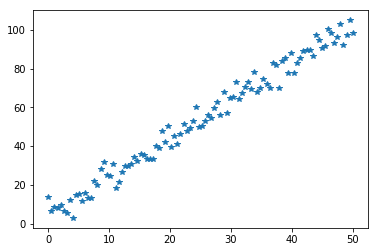

In [49]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [74]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
100/100 [==============================] - 0s 128us/step - loss: 16.9098
Epoch 2/500
100/100 [==============================] - 0s 135us/step - loss: 16.9122
Epoch 3/500
100/100 [==============================] - 0s 175us/step - loss: 16.9011
Epoch 4/500
100/100 [==============================] - 0s 361us/step - loss: 16.8552
Epoch 5/500
100/100 [==============================] - 0s 273us/step - loss: 16.8889
Epoch 6/500
100/100 [==============================] - 0s 162us/step - loss: 16.9019
Epoch 7/500
100/100 [==============================] - 0s 204us/step - loss: 16.9354
Epoch 8/500
100/100 [==============================] - 0s 123us/step - loss: 16.9697
Epoch 9/500
100/100 [==============================] - 0s 150us/step - loss: 16.9971
Epoch 10/500
100/100 [==============================] - 0s 186us/step - loss: 16.9511
Epoch 11/500
100/100 [==============================] - 0s 148us/step - loss: 16.8876
Epoch 12/500
100/100 [==============================] - 0s 188u

100/100 [==============================] - 0s 105us/step - loss: 16.8353
Epoch 191/500
100/100 [==============================] - 0s 148us/step - loss: 16.8542
Epoch 192/500
100/100 [==============================] - 0s 151us/step - loss: 16.8495
Epoch 193/500
100/100 [==============================] - 0s 137us/step - loss: 16.8454
Epoch 194/500
100/100 [==============================] - 0s 111us/step - loss: 16.8404
Epoch 195/500
100/100 [==============================] - 0s 173us/step - loss: 16.8441
Epoch 196/500
100/100 [==============================] - 0s 181us/step - loss: 16.8462
Epoch 197/500
100/100 [==============================] - 0s 164us/step - loss: 16.8449
Epoch 198/500
100/100 [==============================] - 0s 159us/step - loss: 16.8538
Epoch 199/500
100/100 [==============================] - 0s 159us/step - loss: 16.8721
Epoch 200/500
100/100 [==============================] - 0s 182us/step - loss: 16.8751
Epoch 201/500
100/100 [==============================] - 

100/100 [==============================] - 0s 133us/step - loss: 16.8380
Epoch 379/500
100/100 [==============================] - 0s 163us/step - loss: 16.8590
Epoch 380/500
100/100 [==============================] - 0s 107us/step - loss: 16.8238
Epoch 381/500
100/100 [==============================] - 0s 134us/step - loss: 16.8295
Epoch 382/500
100/100 [==============================] - 0s 135us/step - loss: 16.8317
Epoch 383/500
100/100 [==============================] - 0s 136us/step - loss: 16.8185
Epoch 384/500
100/100 [==============================] - 0s 152us/step - loss: 16.8461
Epoch 385/500
100/100 [==============================] - 0s 136us/step - loss: 16.8474
Epoch 386/500
100/100 [==============================] - 0s 124us/step - loss: 16.8867
Epoch 387/500
100/100 [==============================] - 0s 153us/step - loss: 16.8892
Epoch 388/500
100/100 [==============================] - 0s 171us/step - loss: 16.8735
Epoch 389/500
100/100 [==============================] - 

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [75]:
x_for_predictions = np.linspace(0,50,1000)

In [76]:
y_predicted = model.predict(x_for_predictions)

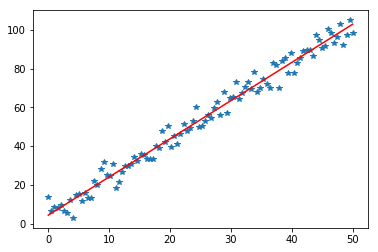

In [78]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [83]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [84]:
mean_squared_error(y,prediction_for_true_y)

16.820542043655355

In [85]:
mean_absolute_error(y,prediction_for_true_y)

3.291464809895978

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!